In [18]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import cmocean.cm as cmo
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from matplotlib.patches import Rectangle

In [19]:
path = "../data_for_plots/" 

In [20]:
HT = xr.open_mfdataset(path + "transient_heat_transports_0201-01-01_0300-12-30_zonal_vertical_integral.nc")
SIarea = xr.open_mfdataset(path + "SIarea_0201-01-01_0300-12-30_JJA_zonal_mean.nc")

In [21]:
SIedge15 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.15) + 10).values
SIedge80 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.80) + 10).values

In [22]:
THTdivminusSTD = HT.THTdiv - HT.THTdivstd
THTdivplusSTD = HT.THTdiv + HT.THTdivstd
THTrefminusSTD = HT.THTref - HT.THTrefstd
THTrefplusSTD = HT.THTref + HT.THTrefstd
THTeddyminusSTD = HT.THTeddy - HT.THTeddystd
THTeddyplusSTD = HT.THTeddy + HT.THTeddystd
THTdiveddyminusSTD = HT.THTdiveddy - HT.THTdiveddystd
THTdiveddyplusSTD = HT.THTdiveddy + HT.THTdiveddystd
THTrefeddyminusSTD = HT.THTrefeddy - HT.THTrefeddystd
THTrefeddyplusSTD = HT.THTrefeddy + HT.THTrefeddystd
THTtrapminusSTD = HT.THTtrap - HT.THTtrapstd
THTtrapplusSTD = HT.THTtrap + HT.THTtrapstd
THTtrackminusSTD = HT.THTtrack - HT.THTtrackstd
THTtrackplusSTD = HT.THTtrack + HT.THTtrackstd
THTdivtrackminusSTD = HT.THTdivtrack - HT.THTdivtrackstd
THTdivtrackplusSTD = HT.THTdivtrack + HT.THTdivtrackstd

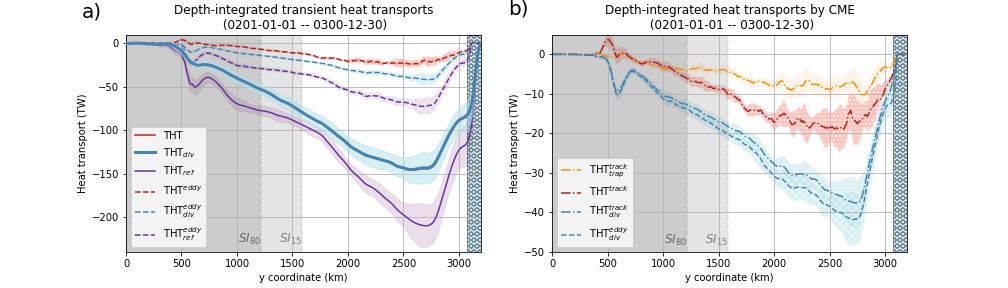

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

HT.THT.plot(ax=ax[0], label="THT", color="firebrick")
HT.THTdiv.plot(ax=ax[0], label="THT$_{div}$", color="steelblue", lw=3, zorder=11)
ax[0].fill_between(HT.YG, THTdivminusSTD, THTdivplusSTD, color="powderblue", alpha=0.5, zorder=10)
HT.THTref.plot(ax=ax[0], label="THT$_{ref}$", color="rebeccapurple")
ax[0].fill_between(HT.YG, THTrefminusSTD, THTrefplusSTD, color="thistle", alpha=0.5)

HT.THTeddy.plot(ax=ax[0], label="THT$^{eddy}$", color="firebrick", ls="--")
ax[0].fill_between(HT.YG, THTeddyminusSTD, THTeddyplusSTD, fc="salmon", ec="w", hatch="xxx", alpha=0.5)
HT.THTdiveddy.plot(ax=ax[0], label="THT$_{div}^{eddy}$", color="steelblue", ls="--")
ax[0].fill_between(HT.YG, THTdiveddyminusSTD, THTdiveddyplusSTD, fc="powderblue", ec="w", hatch="xxx", alpha=0.5)
HT.THTrefeddy.plot(ax=ax[0], label="THT$_{ref}^{eddy}$", color="rebeccapurple", ls="--")
ax[0].fill_between(HT.YG, THTrefeddyminusSTD, THTrefeddyplusSTD, fc="thistle", ec="w", hatch="xxx", alpha=0.5)

ax[0].legend(loc=3)
ax[0].grid()
ax[0].set_title("Depth-integrated transient heat transports\n (0201-01-01 -- 0300-12-30)")
ax[0].set_ylabel("Heat transport (TW)")
ax[0].set_xticks(np.arange(0, 3.2e6, 0.5e6))
ax[0].set_xticklabels(np.arange(0, 3200, 500))
ax[0].set_xlabel("y coordinate (km)")
ax[0].set_xlim(0, 3.2e6)
ax[0].set_ylim(-240, 10)

ax[0].vlines(SIedge15, -240, 10,  colors='gray', linestyle='--', alpha=0.2)
ax[0].add_patch(Rectangle((0, -240), SIedge15, 250, alpha=0.2, facecolor="gray", edgecolor=None))
ax[0].text(SIedge15, -230, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax[0].vlines(SIedge80, -240, 10,  colors='dimgray', linestyle='--', alpha=0.2)
ax[0].add_patch(Rectangle((0, -240), SIedge80, 250, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax[0].text(SIedge80, -230, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax[0].add_patch(Rectangle((3.07e6, -240), 0.13e6, 250, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))


#########################################################################################################################


HT.THTtrap.plot(ax=ax[1], label="THT$_{trap}^{track}$", color="darkorange", ls="-.")
ax[1].fill_between(HT.YG, THTtrapminusSTD, THTtrapplusSTD, fc="bisque", ec="w", hatch="ooo", alpha=0.5)
HT.THTtrack.plot(ax=ax[1], label="THT$^{track}$", color="firebrick", ls="-.")
ax[1].fill_between(HT.YG, THTtrackminusSTD, THTtrackplusSTD, fc="salmon", ec="w", hatch="ooo", alpha=0.5)
HT.THTdivtrack.plot(ax=ax[1], label="THT$_{div}^{track}$", color="steelblue", ls="-.")
ax[1].fill_between(HT.YG, THTdivtrackminusSTD, THTdivtrackplusSTD, fc="powderblue", ec="w", hatch="ooo", alpha=0.5)
HT.THTdiveddy.plot(ax=ax[1], label="THT$_{div}^{eddy}$", color="steelblue", ls="--")
ax[1].fill_between(HT.YG, THTdiveddyminusSTD, THTdiveddyplusSTD, fc="powderblue", ec="w", hatch="xxx", alpha=0.5)

ax[1].legend(loc=3)
ax[1].grid()
ax[1].set_title("Depth-integrated heat transports by CME\n (0201-01-01 -- 0300-12-30)")
ax[1].set_ylabel("Heat transport (TW)")
ax[1].set_xticks(np.arange(0, 3.2e6, 0.5e6))
ax[1].set_xticklabels(np.arange(0, 3200, 500))
ax[1].set_xlabel("y coordinate (km)")
ax[1].set_xlim(0, 3.2e6)
ax[1].set_ylim(-50, 5)

ax[1].vlines(SIedge15, -50, 5,  colors='gray', linestyle='--', alpha=0.2)
ax[1].add_patch(Rectangle((0, -50), SIedge15, 55, alpha=0.2, facecolor="gray", edgecolor=None))
ax[1].text(SIedge15, -48, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax[1].vlines(SIedge80, -50, 5,  colors='dimgray', linestyle='--', alpha=0.2)
ax[1].add_patch(Rectangle((0, -50), SIedge80, 55, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax[1].text(SIedge80, -48, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax[1].add_patch(Rectangle((3.07e6, -50), 0.13e6, 55, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))

ax[0].text(-4e5, 30, "a)", fontsize=20)
ax[1].text(-4e5, 10, "b)", fontsize=20)

plt.savefig("fig05-THT_CME_contrib.png", dpi=300)